In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
from vcg_connectomics.utils.seg.aff_util import affinitize, seg_to_affgraph
from vcg_connectomics.utils.seg.seg_util import genSegMalis, mknhood3d

from matplotlib import pyplot as plt

In [2]:
def show_imgs(imgs, label='aff'):
    plt.figure(figsize=(20,5))
    for i in range(1,5):
        plt.subplot('14%d' % (i))
        plt.imshow(imgs[i-1])
        plt.title(label+' '+str(i))
    plt.show()

In [3]:
# Load Data
data_path = '/n/coxfs01/zudilin/research/mitoNet/data/file/snemi/'
image_path = data_path + 'img/train-input_df_150.h5'
label_path = data_path + 'label/train-labels.h5'
image = np.array(h5py.File(image_path, 'r')['main'])
label = np.array(h5py.File(label_path, 'r')['main'])
print(image.shape, image.ndim, image.dtype)
print(label.shape, label.ndim, label.dtype)

(100, 1024, 1024) 3 uint8
(100, 1024, 1024) 3 uint16


In [8]:
test_image = image[:4,:196,:196]
test_label = label[:4,:196,:196]

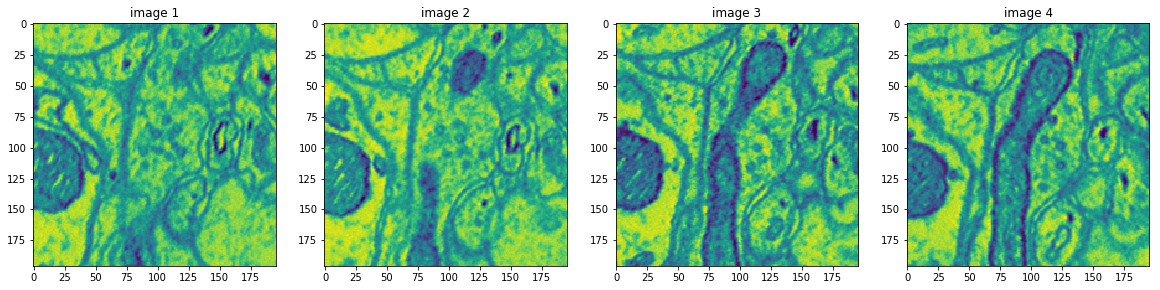

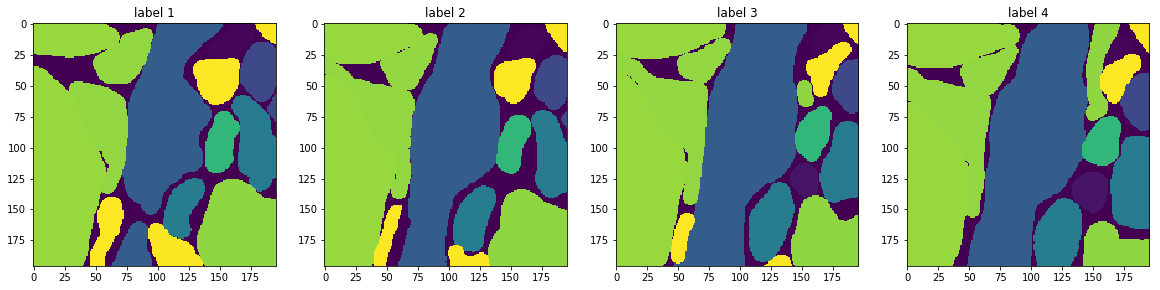

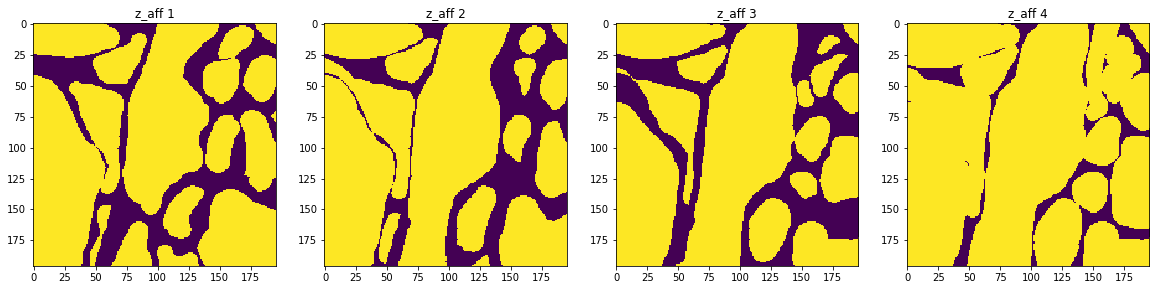

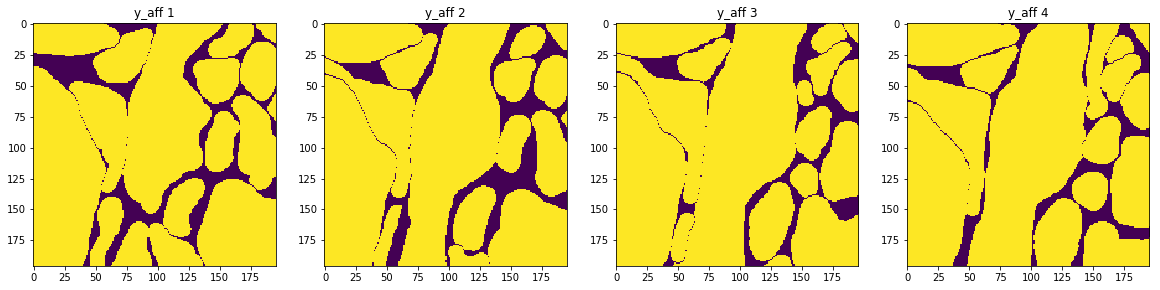

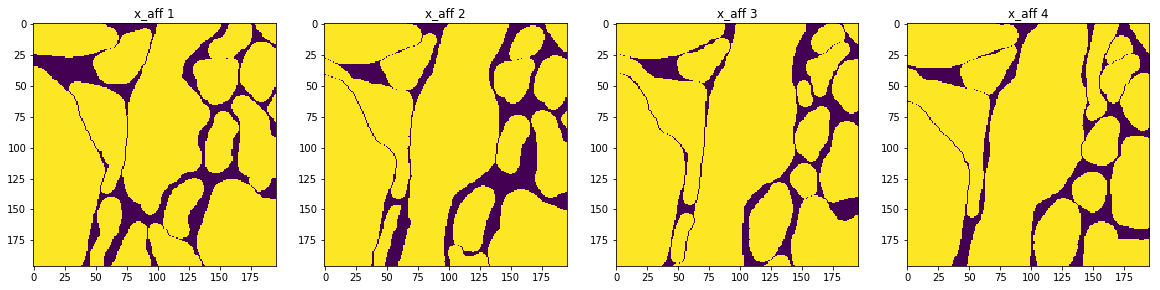

In [9]:
aff1 = affinitize(test_label)
show_imgs(test_image, 'image')
show_imgs(test_label, 'label')
show_imgs(aff1[0], 'z_aff')
show_imgs(aff1[1], 'y_aff')
show_imgs(aff1[2], 'x_aff')

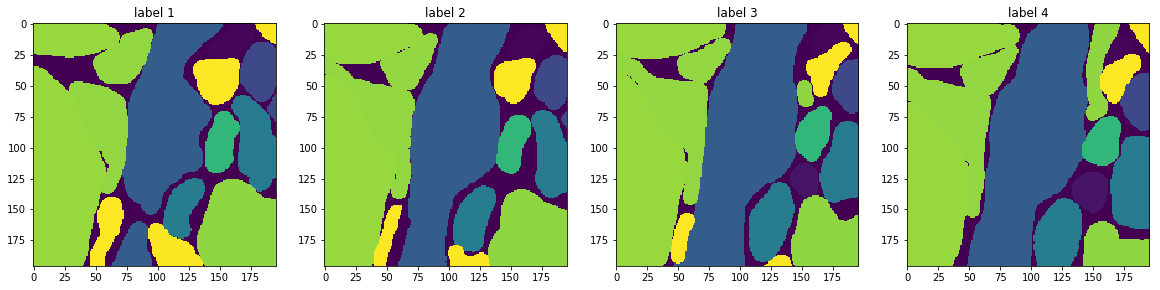

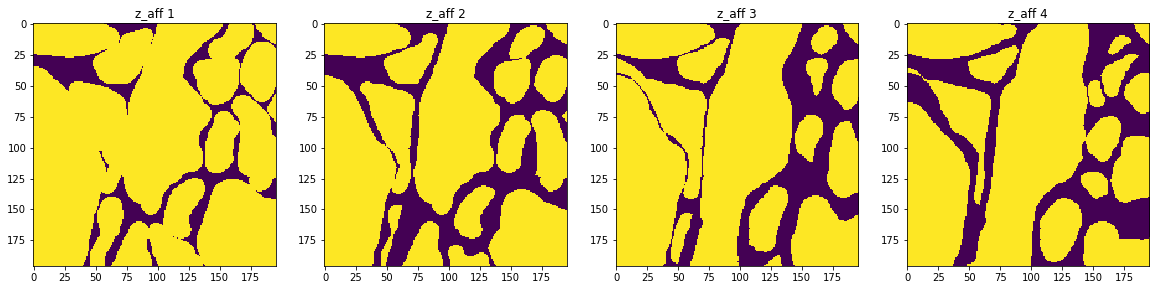

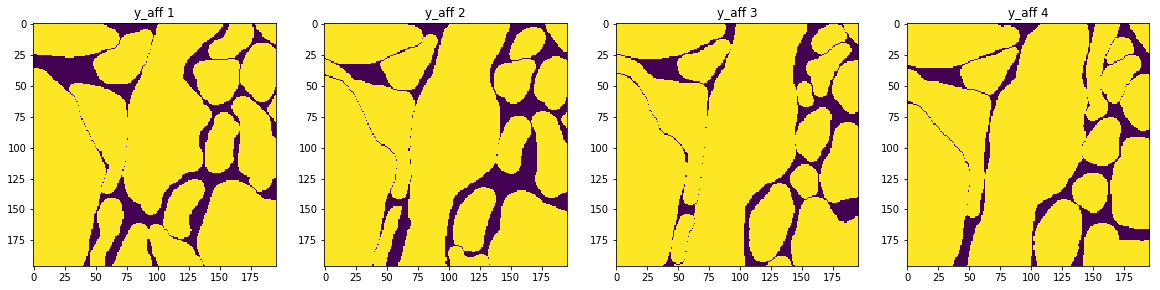

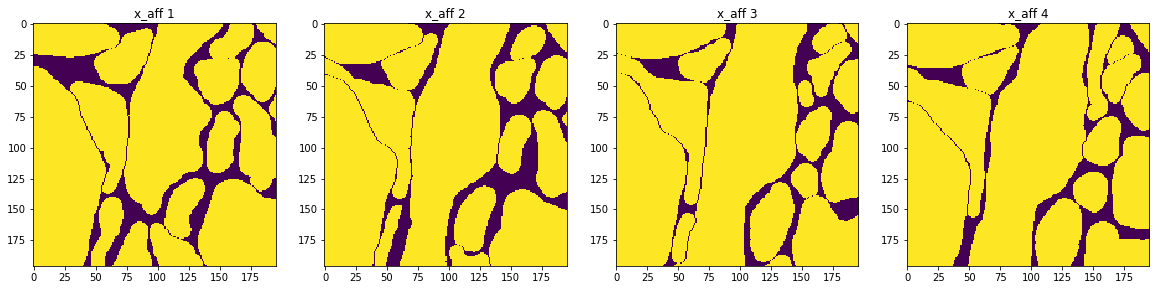

In [6]:
aff2 = seg_to_affgraph(test_label, mknhood3d(1), pad='replicate').astype(np.float32)
show_imgs(test_label, 'label')
show_imgs(aff2[0], 'z_aff')
show_imgs(aff2[1], 'y_aff')
show_imgs(aff2[2], 'x_aff')

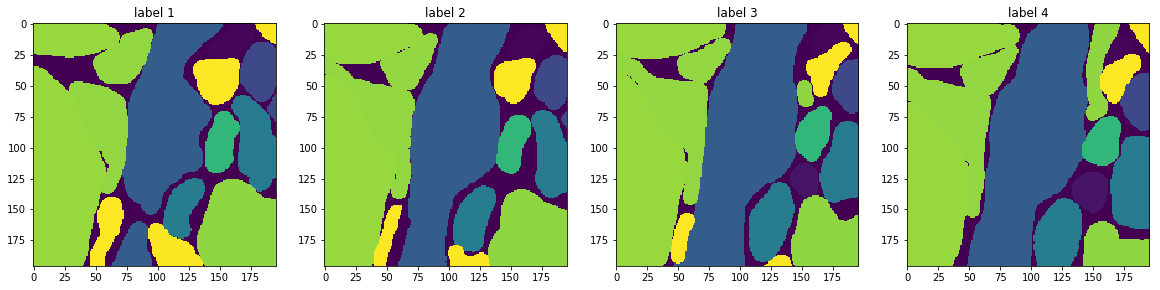

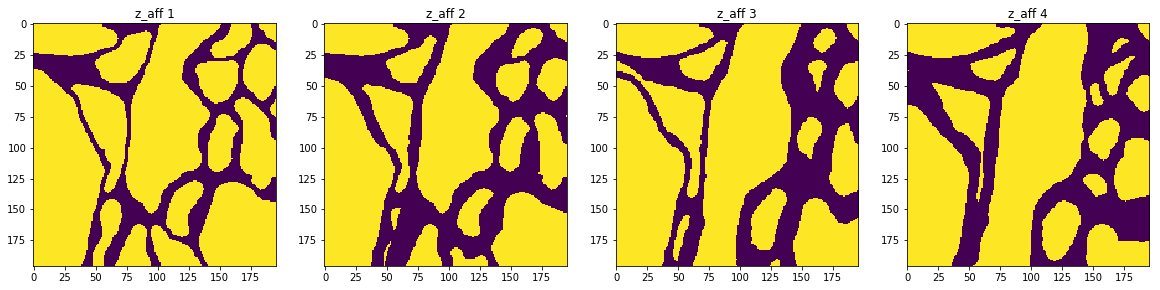

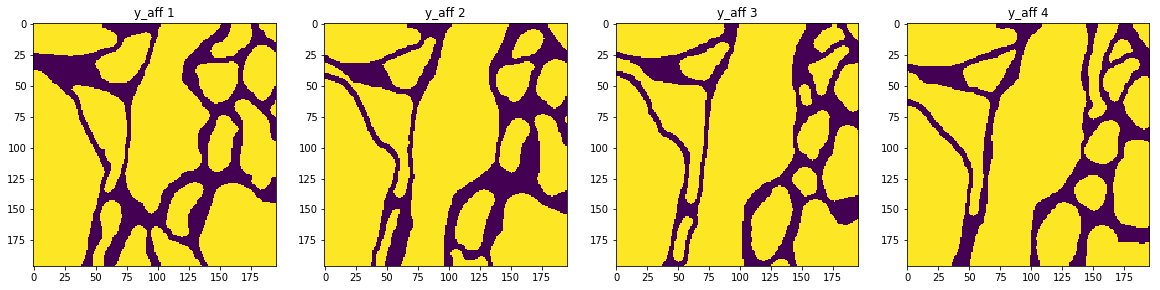

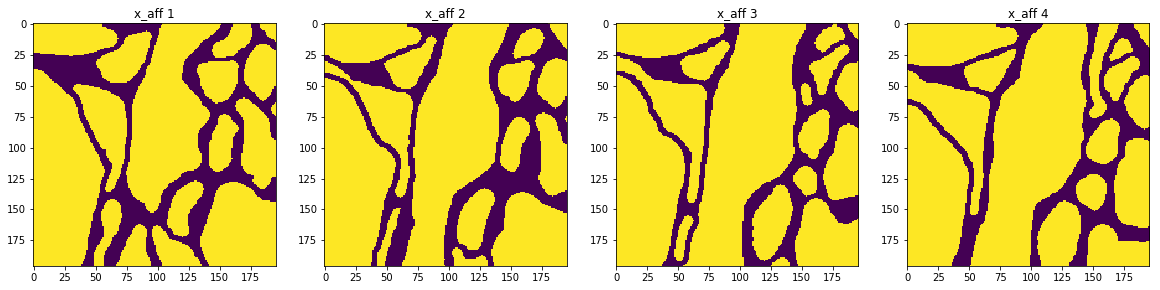

In [7]:
aff3 = seg_to_affgraph(genSegMalis(test_label,1), mknhood3d(1), pad='replicate').astype(np.float32)
show_imgs(test_label, 'label')
show_imgs(aff3[0], 'z_aff')
show_imgs(aff3[1], 'y_aff')
show_imgs(aff3[2], 'x_aff')